# Matplotlib
As it turns out, people are very terrible at understanding numerical data, but can process and interpret visual information at remarkable speeds -- quite the opposite of computers in fact, and as such, you will nearly always want some sort of visual to accompany your analysis.  In this exercise, we'll be using `Matplotlib`, a package in `SciPy`, utilizying MATLAB-like syntax, to generate many plots.

In [1]:
# Import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Configure Jupyter to plot inline
%matplotlib inline

# More Plots With Real Data
In this exercise we'll be using a real data set to test out the functionality of `matplotlib`.

1. Go to the [R Data Repository](https://vincentarelbundock.github.io/Rdatasets/datasets.html) and download, or load directly, the [Aircraft Crash data](https://vincentarelbundock.github.io/Rdatasets/csv/gamclass/airAccs.csv), load it into a Data Frame, and print the first few rows.
1. Generate a histogram for the number of deaths, using bin sizes of your choice.  Be sure to adjust the axis and to add a title to make your plot aesthetically appealing.
1. Make some plots of total number of deaths with respect to time, making use of Pandas time series functionality.  Again, be sure to make your plot aesthetically appealing.
1. We're now going to add in some data from a different source to take a look at the bigger picture in terms of number of passengers flying each year.  Head over to the [World Bank Webpage](http://data.worldbank.org/indicator/IS.AIR.PSGR) and download the `.csv` version of the data in the link.  Clean it up and merge it with your original aircraft accident data above.  Call this merged data set `data_all`.
1. Using `data_all`, create two graphs to visualize how the number of deaths and passengers vary with time, and, as always, make your plots as visually appealing as possible.
1. Make a pie chart representing the number of deaths for each decade.  Consult the `pyplot` documentation to play around with the settings a bit.

In [2]:
# Question 1
air_acc = pd.read_csv("airAccs.csv", index_col = 0)
air_acc.head()

,Date,location,operator,planeType,Dead,Aboard,Ground
1,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,1.0,2.0,0.0
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0
3,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0
4,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),14.0,20.0,0.0
5,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0


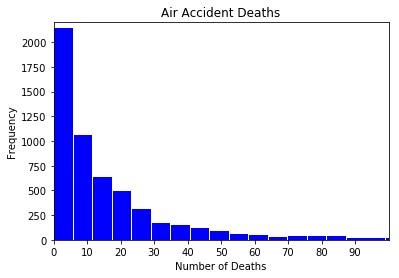

In [3]:
# Question 2
plt.hist(air_acc.Dead.dropna(), bins = 100, color = 'b', rwidth = 0.95)
plt.axis([0, 100, 0, 2200])
plt.xticks(np.arange(0, 100, 10))
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.title('Air Accident Deaths')
plt.show();

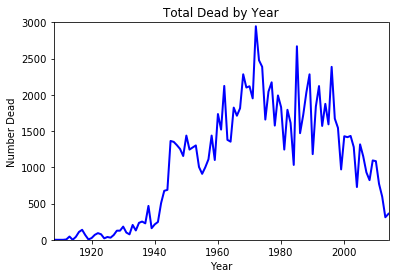

In [4]:
# Question 3
# Create dataframe with 'Date' column to datetime format
time_acc = air_acc.copy()
time_acc = time_acc.set_index(pd.DatetimeIndex(time_acc.Date))[['Dead']]

# Create range of dates involved
date_range = pd.date_range(start = air_acc.Date[1], end = air_acc.Date[len(air_acc)])
time_acc = time_acc.loc[date_range].fillna(0)

# Totals by year
time_acc['Year'] = time_acc.index.year
dead_by_year = time_acc.groupby('Year').sum().Dead

# Plot totals by year
plt.plot(dead_by_year, 'b-', linewidth = 2.0)
plt.axis([dead_by_year.index[0], dead_by_year.index[len(dead_by_year.index) - 1], 0, 3000])
plt.xlabel('Year')
plt.ylabel('Number Dead')
plt.title('Total Dead by Year')
plt.show();

In [5]:
# Question 4
passengers = pd.read_csv("API_IS.AIR.PSGR_DS2/API_IS.AIR.PSGR_DS2_en_csv_v2_tidy.csv", encoding = "ISO-8859-1")
passengers.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1999127.0,2.279341e+06,1.737962e+06,2044188.0,2209428.0,1929907.728,1917922.714
2,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,277361.0,283887.0,274869.0,1010194.0,9.877980e+05,1.132424e+06,1321872.0,1409952.0,1244491.000,1261671.262
3,Albania,ALB,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,238913.0,243691.0,231263.0,768533.0,8.297789e+05,8.143397e+05,865848.0,151632.0,NaN,26633.600
4,Andorra,AND,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Question 4, continued
# Columns 1-4 are irrelevant, so they will be removed and values will be replaced with sums across all countries
passengers_by_year = passengers.loc[:, '1960':'2012'].sum(axis = 0)
passengers_by_year = pd.DataFrame({'Year' : passengers_by_year.index.astype(float),
                                   'Passengers' : passengers_by_year})

# Create dataframe using total deaths by year
deaths = time_acc.groupby('Year').sum()
deaths_by_year = pd.DataFrame({'Year' : deaths.index.astype(float),
                               'Deaths' : deaths.Dead})

# Merge dataframes
data_all = pd.merge(passengers_by_year, deaths_by_year)[['Year', 'Passengers', 'Deaths']]
data_all = data_all[(data_all.Passengers != 0) & (data_all.Deaths != 0)]
data_all.head()

,Year,Passengers,Deaths
10,1970.0,1.866388e+09,2118.0
11,1971.0,1.996079e+09,1951.0
12,1972.0,1.835069e+09,2946.0
13,1973.0,2.407371e+09,2477.0
14,1974.0,2.886075e+09,2387.0


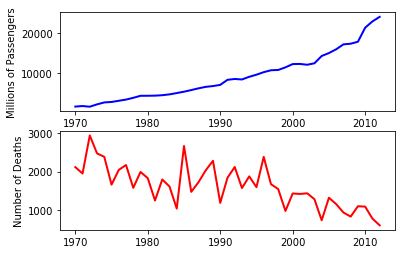

In [7]:
# Question 5
plt.subplot(211)
plt.plot(data_all.Year, data_all.Passengers / 1000000, 'b-', linewidth = 2.0)
plt.ylabel('Millions of Passengers')
plt.subplot(212)
plt.plot(data_all.Year, data_all.Deaths, 'r-', linewidth = 2.0)
plt.ylabel('Number of Deaths')
plt.show()

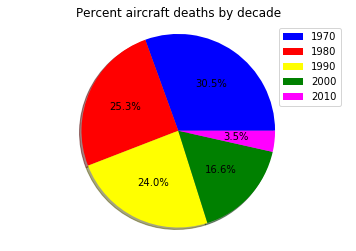

In [8]:
# Question 6
# Make a pie chart representing the number of deaths for each decade. Consult the pyplot documentation to play around
# with the settings a bit.
# Sum deaths per decade
by_decade = data_all.copy()
by_decade['Decade'] = by_decade.Year // 10 * 10
by_decade = by_decade.groupby('Decade').sum()[['Deaths']]

# Create pie chart
labels = '1970', '1980', '1990', '2000', '2010'
colors = ['blue', 'red', 'yellow', 'green', 'magenta']
plt.pie(by_decade.Deaths, colors = colors, autopct = '%1.1f%%', shadow = True)
plt.title('Percent aircraft deaths by decade')
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.show();